In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import topact.densetools
from skimage import morphology
from scipy.ndimage import gaussian_filter

In [84]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [85]:
plt.rcParams['pdf.fonttype'] = 42

In [86]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [87]:
import matplotlib.patches as patches

In [88]:
cm = 1/2.54
font = {'size' : 5}

In [89]:
plt.rc('font', **font)

In [90]:
def df_to_image(df):
    piv = df.pivot_table(index=['x', 'y'], values = ['MIDCounts'], aggfunc='sum').reset_index()
            
    xmin, xmax, ymin, ymax = piv.x.min(), piv.x.max(), piv.y.min(), piv.y.max()
                    
    img = np.zeros((ymax-ymin+1, xmax-xmin+1))
    for row in df.itertuples():
        img[row.y-ymin, row.x-xmin] = row.MIDCounts
                                                
    return img

In [91]:
def plot_geneimg(smoothed, barloc, cbar=True):
        
    plt.imshow(smoothed.T, origin='lower', cmap='RdYlBu_r', interpolation='None', vmax=1.5, extent=[0, 13950, 0, 10500])

    if cbar:
        clb = plt.colorbar(fraction=0.030)
        clb.set_label('Gene count\n(Smoothed)', loc='center', size=5)
        clb.ax.tick_params(labelsize=5, width=1*cm, length=2)
        clb.outline.set_linewidth(1*cm)

    plt.ylabel('y')
    plt.xlabel('x')

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    scalebar = AnchoredSizeBar(ax.transData,
                               1000, '', barloc,
                               pad=0.1,
                               color='black',
                               size_vertical=20,
                               frameon=False,
                               sep=0,
                               fontproperties=fm.FontProperties(size=5))
    

    ax.add_artist(scalebar)

In [92]:
background = np.loadtxt('gene_background.txt')

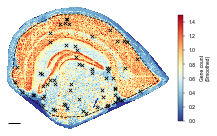

In [93]:
plt.rcParams['figure.figsize'] = (8*cm, 6*cm)
plt.rcParams["font.family"] = "Arial"

plot_geneimg(background, barloc='lower left')

plt.plot(hull_vertices[:,0], hull_vertices[:,1], '--', lw=2*cm, c='black')

pvms = pd.read_csv('../topact-data/chen2022-mousebrain/chen2022_adult_mouse_brain_TOPACT_PVM_LOCI.csv')

plt.scatter(data = pvms, x='centroid-1', y='centroid-0', marker='x', s=30*cm, linewidth=2*cm, color='black')

plt.axis('off')
plt.savefig(f'./immunesplot.pdf',transparent=True,bbox_inches='tight')